In [1]:
# first thing to do is get all the documents in one place.  I have four files to bring together and clean up.
import csv
import json


In [8]:
# the old contracts are kind of a mess, the json isn't valid, it's just line-by-line dicts.
oldks = []
with open("raw-data/contracts7-24-17.json") as oldcj:
    for line in oldcj.readlines():
        ld = json.loads(line)
        if 'contract' in ld:
            if ld["contract"]:
                oldks.append(ld["contract"])
        

In [9]:
len(oldks)

133

In [10]:
oldks[0]

'Acceptable Use Policy\nYour use of the Service is subject to this Acceptable Use Policy. If you are found to be in violation of our policies at any time, as determined by Hasura in its sole discretion, we may warn you or suspend or terminate your account. Please note that we may change our Acceptable Use Policy at any time, and pursuant to the Hasura Terms, it is your responsibility to keep up-to-date with and adhere to the policies posted here. All capitalized terms used herein have the meanings stated in the Terms, unless stated otherwise.\n\nProhibited Content\nThe Content displayed and/or processed through your Application or other web site utilizing the Service shall not contain any of the following types of content:\n\nContent that infringes a third party’s rights (e.g., copyright) according to applicable law;\nExcessively profane content;\nHate-related or violent content;\nContent advocating racial or ethnic intolerance;\nContent intended to advocate or advance computer hacking

In [11]:
# actually I'm just going to use pandas to handle the csv file, because the csv module is a mess.
import pandas as pd
kcsv = pd.read_csv("raw-data/contracts-11-09-17.csv")

In [12]:
kcsv.head()

,id,contracturl,linktext,student,businesscategory,company,contract,noncontractdescription,foundnoncontract,noncontracttext,entered
0,2,https://ankiweb.net/account/terms,Legal,paul,internet companies,Anki,Terms and Conditions\r\nPlease read through th...,None (arbitrary add),f,AnkiWeb is a free companion to the computer ve...,2017-08-17 03:05:43.995519
1,3,https://www.spotify.com/us/legal/end-user-agre...,terms and conditions of use,paul,internet companies,Spotify,Spotify Terms and Conditions of Use\r\n\r\nEff...,None (arbitrary add),f,"About Us\r\nWith Spotify, it’s easy to find th...",2017-08-23 02:48:38.207869
2,4,https://www.clearxchange.com/legal,LEGAL AND PRIVACY,paul,internet companies,ClearXChange,CLEARXCHANGE TERMS OF USE\r\nLast updated: Dec...,None (arbitrary add),f,"clearXchange® is becoming Zelle℠!\r\nJune 12, ...",2017-08-27 20:04:28.021259
3,5,https://www.clearxchange.com/legal,service agreement,paul,internet companies,ClearXChange,THE CLEARXCHANGE.COM USER SERVICE AGREEMENT\r\...,None (arbitrary add),f,"News\r\n\r\nJournalists and analysts, please c...",2017-08-27 20:06:14.873878
4,6,https://www.clearxchange.com/legal#esign,e-sign agreement,paul,internet companies,ClearXChange,CLEARXCHANGE E-SIGN DISCLOSURE AND CONSENT\r\n...,None (arbitrary add),f,HOW IT WORKS\r\nWe unite with the top banks to...,2017-08-27 20:08:03.822403


In [13]:
csvks = list(kcsv["contract"].copy())

In [15]:
len(csvks)

579

In [16]:
# for the non-contracts I know that there are NaN entries that are floats
csv_nonk = [x for x in list(kcsv["noncontracttext"].copy()) if type(x) is not float]

In [17]:
len(csv_nonk)

530

In [19]:
# finally the privacy policies
with open("raw-data/privacypolicies.json") as pj:
    privacypolicies = json.load(pj)

len(privacypolicies)

18

In [20]:
from dirtyclean import clean
true_contracts = [clean(x) for x in csvks + oldks]
false_contracts = [clean(x) for x in csv_nonk + privacypolicies]

In [21]:
len(true_contracts)

712

In [22]:
len(false_contracts)

548

In [23]:
# what the hey, let's balance the classes a little by grabbing some texts from wikipedia
import wikipedia
w1 = wikipedia.random(10)

In [24]:
print(w1)

['Dennis Flynn', 'The Avenues', 'Rudolf Urban (Berlin Wall victim)', 'List of tallest buildings in Barcelona', 'Wright Endurance', 'Lajeado Macuco River', 'Stags Leap', 'Souastre', 'John R. Gordon', 'Rast']


In [25]:
wpages1 = [wikipedia.page(x).content for x in w1]

/Users/pauliglot/.local/share/virtualenvs/scrapecontracts-dTqPK231/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


DisambiguationError: "The Avenues" may refer to: 
The Avenues, Salt Lake City
The Avenues, Harare
The Avenues (gang)
The Avenues (Kuwait)
The Avenues (shopping mall)
The Avenues, Kingston upon Hull
Phoenix metropolitan area
Sunset District
Avenue (disambiguation)

In [26]:
# oh ffs. 
wpages1 = []
for x in w1:
    try: 
        wpages1.append(wikipedia.page(x).content)
    except:
        pass

/Users/pauliglot/.local/share/virtualenvs/scrapecontracts-dTqPK231/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [27]:
len(wpages1)

7

In [28]:
for x in range(5):
    w_titles = wikipedia.random(10)
    for y in w_titles:
        try: 
            wpages1.append(wikipedia.page(y).content)
        except:
            pass

/Users/pauliglot/.local/share/virtualenvs/scrapecontracts-dTqPK231/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [29]:
false_contracts += [clean(x) for x in set(wpages1)]
len(false_contracts)

603

In [30]:
# that's better.  Now, in order to limit the preprocessing tasks I'm not going to do anything else to these texts.
# most of the preprocessing that dirtyclean doesn't do will be done by sklearn.feature_extraction.text.CountVectorizer

# now let's make a dataframe out of this stuff.  
df = pd.DataFrame([[x, 1] for x in true_contracts] + [[x, 0] for x in false_contracts], columns=["document", 'is_contract'])

In [31]:
df.head()

,document,is_contract
0,Terms and Conditions Please read through this ...,1
1,Spotify Terms and Conditions of Use Effective ...,1
2,CLEARXCHANGE TERMS OF USE Last updated Decembe...,1
3,THE CLEARXCHANGE COM USER SERVICE AGREEMENT La...,1
4,CLEARXCHANGE E SIGN DISCLOSURE AND CONSENT Las...,1


In [32]:
len(df)

1315

In [34]:
df.to_csv("base-dataset.csv")

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
transformer = CountVectorizer(strip_accents='unicode', stop_words='english', min_df=5)

In [37]:
tokens = pd.DataFrame(transformer.fit_transform(df["document"]).toarray(), columns=transformer.get_feature_names())

In [42]:
# going to try a test here: 
print(transformer.transform([clean(x) for x in ["this is a test, and I am petting a cat who is cute and fluffy and contract", "meow purr this is a desk and a chair and a computer not a cat"]]))

  (0, 1178)	1
  (0, 1770)	1
  (0, 7982)	1
  (1, 1178)	1
  (1, 1248)	1
  (1, 1597)	1
  (1, 2269)	1


In [43]:
# so that's how I actually get a prediction... now let's fit a model and see how productionizing this works in practice. 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tokens, df["is_contract"].copy(), test_size=0.2)

In [44]:
easymodel = BernoulliNB()
easymodel.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [45]:
easypreds = easymodel.predict_proba(x_train)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, easypreds[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.970517599698


In [46]:
testpreds = easymodel.predict_proba(x_test)
testfpr, testtpr, testthresholds = roc_curve(y_test, testpreds[:,1])
test_auc = auc(testfpr, testtpr)
print(test_auc)

0.964218566392


In [47]:
# that's acceptable.  Let's see what this looks like, actually.  
print(testpreds)

[[  0.00000000e+000   1.00000000e+000]
 [  5.41805053e-267   1.00000000e+000]
 [  1.00000000e+000   2.77724490e-228]
 [  2.36471615e-081   1.00000000e+000]
 [  0.00000000e+000   1.00000000e+000]
 [  1.57305215e-102   1.00000000e+000]
 [  1.00000000e+000   8.30591829e-202]
 [  2.20446054e-202   1.00000000e+000]
 [  0.00000000e+000   1.00000000e+000]
 [  1.51422260e-010   1.00000000e+000]
 [  1.00000000e+000   1.74874462e-262]
 [  1.00000000e+000   2.77070998e-271]
 [  1.00000000e+000   1.05663001e-293]
 [  1.00000000e+000   1.53134747e-305]
 [  9.99997178e-001   2.82221731e-006]
 [  0.00000000e+000   1.00000000e+000]
 [  1.00000000e+000   1.03161271e-264]
 [  1.00000000e+000   4.61536524e-257]
 [  2.58264058e-027   1.00000000e+000]
 [  5.70658970e-263   1.00000000e+000]
 [  8.94896525e-288   1.00000000e+000]
 [  2.43394975e-281   1.00000000e+000]
 [  1.00000000e+000   4.74827324e-284]
 [  6.02222560e-250   1.00000000e+000]
 [  1.00000000e+000   1.63868904e-284]
 [  3.20532603e-043   1.0

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/pauliglot/.local/share/virtualenvs/scrapecontracts-dTqPK231/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


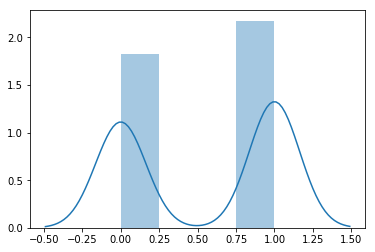

In [49]:
sns.distplot(testpreds[:,1])

In [52]:
# well, no real worries about setting a cutoff value then, eh? that's a beautiful separation. 
# now let's look into making some predictions. 

def make_prediction(newdata):
    if type(newdata) is str:
        newdata = [newdata]
    transformed = transformer.transform([clean(x) for x in newdata])
    predictions = easymodel.predict_proba(transformed)
    return predictions[:,1]
    

In [53]:
# time for an experiment! 
wikistuff = []
for x in wikipedia.random(5):
    try: 
        wikistuff.append(wikipedia.page(y).content)
    except:
        pass
print(make_prediction(wikistuff[0]))

[  1.79131026e-295]


In [54]:
print(make_prediction(wikistuff))

[  1.79131026e-295   1.79131026e-295   1.79131026e-295   1.79131026e-295
   1.79131026e-295]


In [55]:
def decide(predslist):
    return [x >= 0.5 for x in predslist]

print(decide(make_prediction(wikistuff)))

[False, False, False, False, False]


In [56]:
greatclipsTOS = """
TERMS & CONDITIONS
Effective June 2014

Welcome to Great Clips website (the “Site”) or the Great Clips application downloaded through a mobile or tablet device (the "App"). By accessing the Site or App, you agree to the following Terms of Use. The terms “Great Clips” or “us” or “we” or “our” refers to Great Clips, Inc., the owner of the Site, and its subsidiaries, affiliates, partners, agents, attorneys, officers, directors, and employees. The terms “you” or “your” refer to the user or viewer of the Site or App. We reserve the right to terminate or suspend your account or ability to use or access the Site, the App, or any portion thereof for any reason whatsoever.

Modifications. 

Great Clips reserves the right to change, modify, or otherwise alter the Terms of Use at any time and at our sole discretion without specific notice to you and will post any updates to the Terms of Use on our Site. Please review the Terms of Use periodically. Your continued use of the Site and our App following any changes, modifications, or other alterations to the Terms of Use shall constitute your acceptance to comply with and being bound by the revised Terms of Use.

Accounts and Registrations.  
 Certain sections of the Site or pages on the App may require you to provide personal information in order to access and/or use certain features, functions or services of the Site. If information is requested, you agree to provide us with accurate, complete registration information. Please read our Privacy Policy, which describes the personal information we collect, use, manage, disclose and store. Any information provided on the Site or through the App is for your personal use only. You may not allow any other person or entity to use your user name or password on any portion of the Site or App that requires a user name or password. Great Clips is not liable for any damages, injury, losses or harm caused by or related to the theft, appropriation, or any misuse or disclosure of your account information.

Ownership of Intellectual Property. 
The contents of this Site and the App, including all software, text, characters, images, videos, photographs, designs, illustrations, audio and video files, artwork, graphics, databases, logos, proprietary information, and copyrightable or otherwise legally protective elements of the Site, and all trademarks, service marks, and trade names (collectively the “Materials”) are the property of Great Clips and/or its subsidiaries, licensors, affiliates, assigns, or other respective owners. The Materials are protected under copyright law and the copying, redistribution, use or publication by you of the Materials or any part of the Site, except as allowed by the "Limited License; Permitted Uses" section below, is strictly prohibited.

Limited License; Permitted Uses.  
 You are granted a non-exclusive, non-transferable, non-assignable revocable license (a) to access and use the Site strictly in accordance with these Terms of Use and any other legal notices on this Site; (b) to download and use the App strictly in accordance with these Terms of Use and any other legal notices on the Site or provided through the platform accessed to download the App; (c) to use the Site and App solely for personal and non-commercial purposes; and (d) to print out or copy discrete information from the Site solely for personal and non-commercial purposes and provided that you maintain all copyright and other policies contained therein.

Postings. 
 Portions of this Site may be developed to permit you and other users to submit, distribute, transmit, upload, post or exchange opinions, ideas, information, messages, drawings, e-mails, photographs, profiles, video and audio files, text, images, or other materials or information onto the Site (“Postings”). You are solely responsible for your Postings.

You may not post, submit, upload or otherwise transmit any graphics, text, messages, photographs, images, audio or video files, artwork or other content or information onto the Site or the App that:
1.contains a virus or other harmful component or otherwise interferes with, impairs or damages the Site and any individual’s or entity’s use or enjoyment of the Site;
2.infringes or violates the right of any individual or entity including, without limitation, any right of privacy, any copyright, trademark, patent, trade secret, or other proprietary or intellectual property right, or any contractual rights; 
3.is abusive, offensive, hateful, racist, disruptive, antisocial, defamatory, threatening, violent, vulgar, sexually explicit, pornographic, slanderous or otherwise harmful;  
4.constitutes hate speech.

You may not upload, post, email, transmit or otherwise make available any unsolicited or unauthorized advertising, promotional materials, “junk mail,” “spam,” “chain letters,” “pyramid schemes,” or any other form of solicitation.

Great Clips possesses the right to change, use, delete, exploit and distribute the Posting in any manner and at our sole discretion. We shall not be required to pay you or any person or entity any form of compensation for our exploitation, distribution or otherwise use of your Posting or any ideas, concepts, or other information or content in the Posting. Any and all Postings shall become the property of Great Clips and you authorize us to use the Posting in whole or in part, throughout the universe, in perpetuity in or on any media in any manner without any compensation to you or any person or entity.

Great Clips reserves the right but does not monitor, endorse, edit or screen any Postings. Postings do not necessarily reflect the views or opinions of Great Clips. You acknowledge, understand and agree that Great Clips shall neither assume nor has any responsibility or liability for any Postings or for any claims, damages, injury or losses resulting from the Postings, their use and/or appearance on the Site.

Links to Other Websites.  
 The Site contains links to other websites. These links are provided solely as a convenience to you and are not endorsements of any products or services in such websites and these websites may have privacy policies different than our Privacy Policy.

Errors, Corrections and Changes. 
 Great Clips does not represent or warrant that the Site or App will be error-free, free of viruses or other harmful components, or that defects will be corrected. We do not represent or warrant that the information available on or through the Site or App will be correct, accurate, timely or otherwise reliable. We may make changes to the features, functionality or content of the Site or App at any time.

Copyrights and Copyright Agents.
Great Clips respects the intellectual property of others, and we ask you to do the same. If you believe that your work has been copied in any way that constitutes copyright infringement, please provide our Copyright Agent the following information as required by the Online Copyright Infringement Liability Limitation Act of the Digital Millennium Copyright Act, (“DMCA”), 17 U.S.C. § 512: (a) An electronic or physical signature of the person authorized to act on behalf of the owner of the copyright interest; (b) A description of the copyrighted work that you claim has been infringed; (c) A description of where the material that you claim is infringing is located on the Site; (d) Your name, physical address, telephone number, and e-mail address; (e) A statement by you that you have a good faith belief that the disputed use is not authorized by the copyright owner, his/her/its agent, or the law; and (f) A statement by you, made under penalty of perjury, that the above information in your notice is accurate and that you are the copyright owner or authorized to act on the copyright owner’s behalf.

Our Copyright Agent for notice of claims of copyright infringement on the Site can be reached as follows: 
copyrightagent@greatclips.com 

Disclaimer. 

THIS SITE AND THE APP ARE INTENDED FOR INFORMATIONAL OR SALON SERVICE PURPOSES ONLY. THE CONTENT, MATERIALS, AND ANY OTHER INFORMATION IN THIS SITE OR ACCESSED THROUGH THE APP IS NOT INTENDED TO CONSTITUTE LEGAL OR PROFESSIONAL ADVICE.

YOUR USE, ACCESS, OR BROWSING OF THIS SITE IS PERFORMED AT YOUR OWN RISK. THE INFORMATION, CONTENT, AND MATERIALS FROM, IN OR THROUGH THE SITE AND APP ARE PROVIDED “AS-IS,” “AS AVAILABLE,” AND “WITH ALL FAULTS.” ALL WARRANTIES, EXPRESS OR IMPLIED, ARE DISCLAIMED (INCLUDING, WITHOUT LIMITATION, TO THE DISCLAIMER OF ANY IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE).

Limitation of Liability.  
 YOU UNDERSTAND, ACKNOWLEDGE, AND AGREE THAT GREAT CLIPS AND THE AFFILIATED PARTIES SHALL NOT BE LIABLE FOR ANY CLAIMS FOR INJURY, LOSS OR DAMAGES ARISING OUT OF OR RELATED TO YOUR USE OF THE SITE, THE APP, OR FROM THIS AGREEMENT INCLUDING, WITHOUT LIMITATION, TO DIRECT, COMPENSATORY, INDIRECT, SPECIAL, INCIDENTAL, CONSEQUENTIAL OR PUNITIVE DAMAGES. THE NEGATION AND LIMITATION OF DAMAGES SET FORTH IN THIS AGREEMENT ARE FUNDAMENTAL ELEMENTS OF THE BASIS OF THE BARGAIN BETWEEN GREAT CLIPS AND YOU. THIS SITE, THE APP AND THE CONTENT THEREIN WOULD NOT BE PROVIDED WITHOUT SUCH LIMITATIONS.

THE AGGREGATE LIABILITY OF GREAT CLIPS AND THE AFFILIATED PARTIES IN CONNECTION WITH ANY CLAIM YOU MAY HAVE ARISING OUT OF OR RELATING TO THE SITE OR THE APP, SHALL NOT EXCEED $100 AND THAT AMOUNT SHALL BE IN LIEU OF ALL OTHER REMEDIES WHICH YOU MAY HAVE AGAINST GREAT CLIPS AND ANY OF OUR AFFILIATED PARTIES.

Applicable Law, Venue and Jurisdiction.  
 This Terms of Use agreement shall be treated as though it were executed and performed in Minnesota, and shall be governed by and construed in accordance with the laws of the State of Minnesota and the laws of the United States without regard to conflict of law principles. You agree that any claim or dispute you may have arising out of or related to the Site or App including, without limitation, your use of the Site or App, the Site’s or App's Contents and Materials, your information provided to the Site or App, and/or these Terms of Use, the Privacy Practices, and any legal notices on this Site must be instituted within one (1) year after the claim arose (if multiple claims, from the date the first claim arose) or be forever waived and barred. You agree that you will bring any claims in, and submit to the exclusive jurisdiction of, the state and federal courts located in the County of Hennepin, in the State of Minnesota.

Any claims or resolution of disputes pursuant to this agreement shall be in your individual capacity and not as a plaintiff or class member in any purported class or representative proceeding. You agree, to the extent permitted by applicable law, that 1) any and all disputes, claims, and causes of action arising out of or in connection with the Site, App, or these Terms of Use will be resolved individually in the forum designated in this section, without resort to any form of class action; and 2) any and all claims, judgments, and awards will be limited to actual third-party, out-of-pocket costs incurred (if any), but in no event will attorney's fees be awarded or recoverable.
"""

In [57]:
decide(make_prediction(greatclipsTOS))

[True]

In [58]:
# here's a tough one.  I want this to be false, because privacy policies != ToS, but this is a fairly likely failure
citiPRIVACY = """
PRIVACY


 
Privacy for Consumers at Citi
Our goal is to maintain your trust and confidence when handling personal information about you.

YOU HAVE CHOICES

Citi customers have the opportunity to make choices about how their personal information may be shared. As you consider this, we encourage you to make choices that enable us to provide you with quality products and services that help you meet your financial needs and objectives.

SECURITY OF PERSONAL INFORMATION

The security of your personal information is our priority. We protect this information by maintaining physical, electronic and procedural safeguards that meet applicable law. We train our employees in the proper handling of personal information. When we use other companies to provide services for us, we require them to protect the confidentiality of personal information they receive.

Citi Online Privacy Statement
Our Online Privacy Statement describes how we may collect, use and share information you provide when you visit this website, receive our emails or interact with advertisements we have on third-party websites.

Our Online Privacy Statement does not cover:

Information collected and used on Citi social media sites such as blog.citigroup.com
Information you provide to the websites we advertise or place content on and may link to
We encourage you to read the privacy policies on these sites.

What Information Do We Collect?
How Do We Use the Information We Collect?
How Do Our Online Services Use Cookies and Other Tracking Technologies?
Can You Control Your Information that’s Collected and Used Online?
1. What Information Do We Collect

We collect two types of online information: non-personal and personal.

Non-Personal Information

When you visit our site, we collect the IP address of the device you use to connect to the Internet. In addition, we gather information such as what browser and which version of it you're using, the type of operating system you have, and which site you came from or advertisement you viewed or clicked on. This device information helps us provide an online experience that matches your device and to manage our online advertising.

We may also supplement the information we collect with information we receive from other companies. For example, we may use marketing segments developed by us or other companies to customize certain services to your local area and provide relevant Citi offers tailored to you.

Personal Information

In addition to the information described in the previous section, we may also gather personal information that you provide to us such as your name, address, phone number, and email address. Collecting this personal information enables us to offer you online experiences that help you with your financial needs. For example, we collect personal information when you are:

Banking online
Applying for a new program or account
If you've enrolled in Citi services, such as online bill payment, we collect personal information about your transactions, and how you interact with third parties such as those you pay like a utility company or phone company. Collecting this information enables us to provide you these services. You can refer to the terms and conditions for your account or service to learn how your information is collected and used.

If we have received personal information from you, or have information that is publicly available from other sources, we may use it in combination with the information that Citi collects online. This information may be used to better tailor or personalize our service and marketing communications with you, both online and offline.

If you are a Citi customer, the personal information you provide online is held by the Citi business that maintains your account or is processing your application for a new product or service. You can access and/or change information in connection with your account or application by logging on to your account online or telephoning customer service.

Please see our Privacy Notices, which we provide to all our individual customers, for a comprehensive explanation of how we collect, use and share personal information and what you can do to limit the use and sharing of your information as our customer. If you have a retail store or gas card issued by Citibank, N.A., you may call the number that appears on the Privacy Statement you receive. All customers may also call Customer Service at any time with questions or to make privacy choices.

   	Citibank	Citibank® Consumer Privacy Notice
Citi Mortgage   	Citi Mortgage Privacy Notice
Citi Personal Wealth Management   	Citi Personal Wealth Management Privacy Notice
Citi Cards	Citi Consumer Cards Privacy Notice
Citi Private Bank	Internet Privacy Policy & Statement
2. How Do We Use the Information We Collect?

Citi uses the information we collect about and from you to provide services, to manage our business and to offer an enhanced, personalized online experience on our site and third-party websites.

The information we collect allows us to:

Recognize you when you return to our site so we can personalize your experience
Process applications and transactions
Respond to your requests
Recognize and provide you account related benefits and information on our sites.
Provide you more relevant product and service offers on our sites and in other advertising
We may also use personal information we have about you such as your email or postal address to deliver advertising to you directly or on third party websites.

3. How Do Our Online Services Use Cookies and other Tracking Technologies?

Cookies and Flash Objects
When you browse our site or view one of our emails, or advertisements, Citi and companies we work with, use Flash objects, cookies, web beacons and/or pixel tags to collect device information and store your online preferences, but they do not capture any information that can be used to personally identify you. The information they gather helps us improve your online experience and may include:

Your response to one of our emails or advertisements
Time and duration of your visit to our site
Pages you viewed while on our site
Device Tracking

We may use similar technologies, particularly in mobile advertising, that use device information to help deliver our advertisements and measure advertising campaign effectiveness. We and companies we work with may collect your device information when you visit one of our sites or see our ads. Compiling and comparing these attributes can create a unique ID for individual devices and can be "matched" to the same attributes appearing on other sites or mobile applications. Some companies we work with are also able to associate related devices into households based on common characteristics, such as IP addresses.

Targeted Advertising

Companies we work with place and track our advertisements on third-party websites.

Like most advertisers, we place advertisements where we think they will be most relevant to customers. We place advertisements by developing and using our own marketing segments that may combine online and offline information about our current and prospective customers.

Network advertising companies that provide these services have their own privacy policies and are not subject to our Online Privacy Statement.

4. Can You Control Your Information That's Collected and Used Online?

It's important to note that the information we use about you helps us provide you with products, services and experiences that benefit you. You have the ability to control how your non-personal information is collected and used online.

E-Mail

When you provide your email address, we will use it to send you general notices or important news about your account, request your feedback or opinions and provide updates on special deals and offers that might interest you.

We believe you should be able to choose what kinds of information you receive via email. If you do not want to receive marketing materials by email, just indicate your preference on the contact information for your account or the 'opt-out' link provided in our marketing emails. Please keep in mind that we will continue to notify you by email regarding your account.

Cookies and Flash Objects

You can control whether to accept cookies or not. If you decide to not accept cookies, some features and services on our site may not work properly because we may not be able to recognize and associate you with your Citi account(s). In addition, the offers we provide when you visit us may not be as relevant to you or tailored to your interests.

If you would prefer not to accept cookies, you can:

Change your browser settings to notify you when you receive a cookie, which lets you choose whether or not to accept it; or
Set your browser to automatically not accept any cookies
Deleting cookies does not delete Flash objects. You can learn more about Flash objects - including how to control and disable them - through the Adobe interface. If you choose to delete Flash objects from our sites, then you may not be able to access and use all or part of the sites or benefit from the information and services offered.

Targeted Advertising

We believe that online behavioral advertising helps to provide you with more relevant advertising based upon on the websites you visit.

If you prefer to not receive targeted advertising, you can opt out of some network advertising programs that use your information. To do so please visit the NAI Opt-Out Page. Please note that even if you choose to remove your information (opt out), you will still see advertisements while you're browsing online. However the advertisements you see may be less relevant to you and your interests.

Additionally, many network advertising programs allow you to view and manage the interest categories they have compiled from your online browsing activities. These interest categories help determine the types of targeted advertisements you may receive. The NAI Opt-Out Page provides a tool that identifies its member companies that have cookies on your browser and provides links to those companies.

The Digital Advertising Alliance's Self-Regulatory Principles for Online Behavioral Advertising govern certain online advertising and data collection practices. The principles facilitate transparency about online advertising practices and support consumer choice in managing behavioral advertising. We subscribe to these Principles. For more information about the Principles and the Ad Choices icon visit http://www.youradchoices.com/

Because mobile devices may vary in how they operate and may not use cookies, the choice management options listed above may not work for all mobile devices and mobile apps. Mobile ad management providers make available tools for managing your choices regarding behavioral advertising on mobile devices and mobile apps. Depending upon the advertising company, if you opt out on one device they may also opt you out on any screen considered part of the same household.

Do Not Track

Although, there is no standard for how Do Not Track consumer browser settings should work on commercial websites, the industry has self-regulatory initiatives designed to provide consumers a choice in the types of ads they may see online and to conveniently opt-out from online behavioral ads served by some or all of the companies participating in these programs. Due to a lack of such standards, our websites do not respond to Do Not Track consumer browser settings. For more information see the "About Ads" or NAI links provided above. Many of Citi's advertising vendors and companies participate in these programs. Using the choice mechanisms these programs make available may help you see advertising that is relevant to you or help you avoid seeing interest based advertising generally.

Notice of changes.

From time to time, we may change this Online Privacy Statement. The effective date of this statement, as indicated below, shows the last time this statement was revised or materially changed. Checking the effective date below allows you to determine whether there have been changes since the last time you reviewed the statement.

Effective Date.

This Online Privacy Statement was last modified January 22, 2015.
"""
decide(make_prediction(citiPRIVACY))

[False]

In [59]:
# SWEETTT!!!  Let's look at tos...
citiTERMS = """
Disclaimer
 
NOTICE.
PLEASE READ THESE TERMS AND CONDITIONS CAREFULLY. BY ACCESSING THIS SITE AND ANY PAGES THEREOF, YOU AGREE TO BE BOUND BY THE TERMS AND CONDITIONS BELOW. IF YOU DO NOT AGREE TO THE TERMS AND CONDITIONS BELOW, DO NOT ACCESS THIS SITE, OR ANY PAGES THEREOF.

COPYRIGHT © CITIGROUP 2014. ALL RIGHTS RESERVED.
Copyright in the pages and in the screens displaying the pages, and in the information and material therein and in their arrangement, is owned by Citigroup unless otherwise indicated. 

TRADEMARKS
CITI, CITI and Arc Design, CITIBANK, CITIGROUP, CITICORP and CITI NEVER SLEEPS are trademarks and service marks of Citigroup Inc. and Citibank, N.A. and are used and registered throughout the world. The Blue Wave design is trade dress of Citigroup and is used throughout the world. Citibank, N.A., Citigroup Inc. and their subsidiaries also claim rights in certain other trademarks and service marks contained in these web pages. 

USE OF INFORMATION AND MATERIALS
The information and materials contained in these pages, and the terms, conditions, and descriptions that appear, are subject to change. Unauthorized use of Citigroup's web sites and systems including but not limited to unauthorized entry into Citigroup's systems, misuse of passwords, or misuse of any information posted on a site is strictly prohibited. Not all products and services are available in all geographic areas. Your eligibility for particular products and services is subject to final determination by Citigroup and/or its affiliates. Investment services are not bank deposits or insured by the FDIC or other entity, and are subject to investment risks, including possible loss of principal amount invested. 

LINKS
THIS SITE MAY CONTAIN LINKS TO WEB SITES CONTROLLED OR OFFERED BY THIRD PARTIES (NON-AFFILIATES OF CITIGROUP). CITIGROUP HEREBY DISCLAIMS LIABILITY FOR, ANY INFORMATION, MATERIALS, PRODUCTS OR SERVICES POSTED OR OFFERED AT ANY OF THE THIRD PARTY SITES LINKED TO THIS WEB SITE. BY CREATING A LINK TO A THIRD PARTY WEB SITE, CITIGROUP DOES NOT ENDORSE OR RECOMMEND ANY PRODUCTS OR SERVICES OFFERED OR INFORMATION CONTAINED AT THAT WEB SITE, NOR IS CITIGROUP LIABLE FOR ANY FAILURE OF PRODUCTS OR SERVICES OFFERED OR ADVERTISED AT THOSE SITES. SUCH THIRD PARTY MAY HAVE A PRIVACY POLICY DIFFERENT FROM THAT OF CITIGROUP AND THE THIRD PARTY WEBSITE MAY PROVIDE LESS SECURITY THAN THE CITIGROUP SITE. 

NO WARRANTY.
THE INFORMATION AND MATERIALS CONTAINED IN THIS SITE, INCLUDING TEXT, GRAPHICS, LINKS OR OTHER ITEMS ARE PROVIDED "AS IS", "AS AVAILABLE". CITIGROUP DOES NOT WARRANT THE ACCURACY, ADEQUACY OR COMPLETENESS OF THIS INFORMATION AND MATERIALS AND EXPRESSLY DISCLAIMS LIABILITY FOR ERRORS OR OMISSIONS IN THIS INFORMATION AND MATERIALS. NO WARRANTY OF ANY KIND, IMPLIED, EXPRESSED OR STATUTORY INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF NON-INFRINGEMENT OF THIRD PARTY RIGHTS, TITLE, MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND FREEDOM FROM COMPUTER VIRUS, IS GIVEN IN CONJUNCTION WITH THE INFORMATION AND MATERIALS. 

LIMITATION OF LIABILITY.
IN NO EVENT WILL CITIGROUP BE LIABLE FOR ANY DAMAGES, INCLUDING WITHOUT LIMITATION DIRECT OR INDIRECT, SPECIAL, INCIDENTAL, OR CONSEQUENTIAL DAMAGES, LOSSES OR EXPENSES ARISING IN CONNECTION WITH THIS SITE OR ANY LINKED SITE OR USE THEREOF OR INABILITY TO USE BY ANY PARTY, OR IN CONNECTION WITH ANY FAILURE OF PERFORMANCE, ERROR, OMISSION, INTERRUPTION, DEFECT, DELAY IN OPERATION OR TRANSMISSION, COMPUTER VIRUS OR LINE OR SYSTEM FAILURE, EVEN IF CITIGROUP, OR REPRESENTATIVES THEREOF, ARE ADVISED OF THE POSSIBILITY OF SUCH DAMAGES, LOSSES OR EXPENSES. 

SUBMISSIONS.
All information submitted to Citigroup via this site shall be deemed and remain the property of Citigroup and Citigroup shall be free to use, for any purpose, any idea, concepts, know-how or techniques contained in information a visitor to this site provides Citigroup through this site. Citigroup shall not be subject to any obligations of confidentiality regarding submitted information except as agreed by the Citigroup entity having the direct customer relationship or as otherwise specifically agreed or required by law. 

AVAILABILITY
This site is not intended for distribution to, or use by, any person or entity in any jurisdiction or country where such distribution or use would be contrary to local law or regulation. 

ADDITIONAL TERMS
Certain sections or pages on this site may contain separate terms and conditions, which are in addition to these terms and conditions. In the event of a conflict, the additional terms and conditions will govern for those sections or pages. 

GOVERNING LAW
Use of this site shall be governed by all applicable Federal and State laws.
 """
decide(make_prediction(citiTERMS))

[False]

In [60]:
# well, that's annoying.  Let's see how close it was...
make_prediction(citiTERMS)


array([  1.40918491e-67])

In [61]:
hillsTERMS = """
Terms and Conditions of Your Account
 
IMPORTANT INFORMATION ABOUT PROCEDURES FOR OPENING A NEW ACCOUNT - To help the government fight the funding of terrorism and money laundering activities, federal law requires all financial institutions to obtain, verify, and record information that identifies each person who opens an account.

What this means for you: When you open an account, we will ask for your name, address, date of birth, and other information that will allow us to identify you. We may also ask to see your driver's license or other identifying documents.

PRODUCT DISCLOSURES
Account Fees
Electronic Fund Transfers Error Resolution Notice
Electronic Services Agreement and Disclosure
FUNd Card Disclosure
Reloadable Card Disclosure
Visa Gift Card Disclosure
AGREEMENT - This document, along with any other documents we give you pertaining to your account(s), is a contract that establishes rules which control your account(s) with us. Please read this carefully and retain it for future reference. If you sign the signature card or open or continue to use the account, you agree to these rules. You will receive a separate schedule of rates, qualifying balances, and fees if they are not included in this document. If you have any questions, please call us.

This agreement is subject to applicable federal laws, the laws of the state of Iowa and other applicable rules such as the operating letters of the Federal Reserve Banks and payment processing system rules (except to the extent that this agreement can and does vary such rules or laws). The body of state and federal law that governs our relationship with you, however, is too large and complex to be reproduced here. The purpose of this document is to:

summarize some laws that apply to common transactions;
establish rules to cover transactions or events which the law does not regulate;
establish rules for certain transactions or events which the law regulates but permits variation by agreement; and
give you disclosures of some of our policies to which you may be entitled or in which you may be interested.
If any provision of this document is found to be unenforceable according to its terms, all remaining provisions will continue in full force and effect. We may permit some variations from our standard agreement, but we must agree to any variation in writing either on the signature card for your account or in some other document.

As used in this document the words “we,” “our,” and “us” mean the financial institution and the words “you” and “your” mean the account holder(s) and anyone else with the authority to deposit, withdraw, or exercise control over the funds in the account. However, this agreement does not intend, and the terms “you” and “your” should not be interpreted, to expand an individual’s responsibility for an organization’s liability. If this account is owned by a corporation, partnership or other organization, individual liability is determined by the laws generally applicable to that type of organization. The headings in this document are for convenience or reference only and will not govern the interpretation of the provisions. Unless it would be inconsistent to do so, words and phrases used in this document should be construed so the singular includes the plural and the plural includes the singular.

LIABILITY - You agree, for yourself (and the person or entity you represent if you sign as a representative of another) to the terms of this account and the schedule of charges. You authorize us to deduct these charges, without notice to you, directly from the account balance as accrued. You will pay any additional reasonable charges for services you request which are not covered by this agreement.

Each of you also agrees to be jointly and severally (individually) liable for any account shortage resulting from charges or overdrafts, whether caused by you or another with access to this account. This liability is due immediately, and can be deducted directly from the account balance whenever sufficient funds are available. You have no right to defer payment of this liability, and you are liable regardless of whether you signed the item or benefited from the charge or overdraft.

You will be liable for our costs as well as for our reasonable attorneys’ fees, to the extent permitted by law, whether incurred as a result of collection or in any other dispute involving your account. This includes, but is not limited to, disputes between you and another joint owner; you and an authorized signer or similar party; or a third party claiming an interest in your account. This also includes any action that you or a third party takes regarding the account that causes us, in good faith, to seek the advice of an attorney, whether or not we become involved in the dispute. All costs and attorneys’ fees can be deducted from your account when they are incurred, without notice to you.

DEPOSITS - We will give only provisional credit until collection is final for any items, other than cash, we accept for deposit (including items drawn “on us”). Before settlement of any item becomes final, we act only as your agent, regardless of the form of indorsement or lack of indorsement on the item  and even though we provide you provisional credit for the item. We may reverse any provisional credit for items that are lost, stolen, or returned. Actual  credit  for deposits of, or payable in, foreign currency will be at the exchange rate in effect on final collection in U.S. dollars. We are not responsible for transactions by mail or outside depository until we actually record them. We will treat and record all transactions received after our “daily cutoff time” on a business day we are open, or received on a day we are not open for business, as if initiated on the next business day that we are open. At our option, we may take an item for collection rather than for deposit. If we accept a third-party check for deposit, we may require any third-party indorsers to verify or guarantee their indorsements, or indorse in our presence.

WITHDRAWALS -
Generally - Unless clearly indicated otherwise on the account records, any of you, acting alone, who signs to open the account or has authority to make withdrawals may withdraw or transfer all or any part of the account balance at any time. Each of you (until we receive written notice to the contrary) authorizes each other person who signs or has authority to make withdrawals to indorse any item payable to you or your order for deposit to this account or any other transaction with us.

Postdated checks - A postdated check is one which bears a date later than the date on which the check is written. We may properly pay and charge your account for a postdated check even though payment was made before the date of the check, unless we have received written notice of the postdating in time to have a reasonable opportunity to act. Because we process checks mechanically, your notice will not be effective and we will not be liable for failing to honor your notice unless it precisely identifies the number, date, amount and payee of the item.

Checks and withdrawal rules - If you do not purchase your check blanks from us, you must be certain that we approve the check blanks you purchase. We may refuse any withdrawal or transfer request which you attempt on forms not approved by us or by any method we do not specifically permit. We may refuse any withdrawal or transfer request which is greater in number than the frequency permitted, or which is for an amount greater or less than any withdrawal limitations. We will use the date the transaction is completed by us (as opposed to the date you initiate it) to apply the frequency limitations. In addition, we may place limitations on the account until your identity is verified. Any withdrawal requests initiated and authorized by you, including, but not limited to, those made at an automated teller machine (ATM) and point-of-sale (POS) terminal, may be allowed to overdraw your available account balance and may be subject to applicable overdraft fees.

Even if we honor a nonconforming request, we are not required to do so later. If you violate the stated transaction limitations (if any), in our discretion we  may close your account or reclassify it as a transaction account. If we reclassify your account, your account will be subject to the fees and earnings rules of the new account classification.

If we are presented with an item drawn against your account that would be a “substitute check,” as defined by law, but for an error or defect in the item introduced in the substitute check creation process, you agree that we may pay such item.

See the funds availability policy disclosure for information about when you can withdraw funds you deposit. For those accounts to which our funds availability policy disclosure does not apply, you can ask us when you make a deposit when those funds will be available for withdrawal. We may determine the amount of available funds in your account for the purpose of deciding whether to return an item for insufficient funds at any time between the time we receive the item and when we return the item or send a notice in lieu of return. We need only make one determination, but if we choose to make a subsequent determination,  the account balance at the subsequent time will determine whether there  are insufficient available funds.

A temporary debit authorization hold affects your account balance - On debit card purchases, merchants may request a temporary hold on your account for a specified sum of money, which may be more than the actual amount of your purchase. When this happens, our processing system cannot determine that the amount of the hold exceeds the actual amount of your purchase. This temporary hold, and the amount charged to your account, will eventually be adjusted to the actual amount of your purchase, but it may be up to three days before the adjustment is made. Until the adjustment is made, the amount of funds in your account available for other transactions will be reduced by the amount of the temporary hold. If another transaction is presented for payment in an amount greater than the funds left after the deduction of the temporary hold amount, that transaction will be a nonsufficient funds (NSF) transaction if we do not pay it or an overdraft transaction if we do pay it. You will be charged an NSF or overdraft fee according to our NSF or overdraft fee policy. You will be charged the fee even if you would have had sufficient funds in your account if the amount of the hold had been equal to the amount of your purchase.

Here is an example of how this can occur – assume for this example the following: (1) you have opted-in to our overdraft services for the payment of overdrafts on ATM and everyday debit card transactions, (2) we pay the overdraft, and (3) our overdraft fee is $27 per overdraft.

You have $120 in your account. You swipe your card at the card reader on a gasoline pump. Since it is unclear what the final bill will be, the gas station’s processing system immediately requests a hold on your account in a specified amount, for example, $80. Our processing system authorizes a temporary hold on your account in the amount of $80, and the gas station’s processing system authorizes you to begin pumping gas. You fill your tank and the amount of gasoline you purchased is only $50. Our processing system shows that you have $40 in your account available for other transactions ($120 - $80 = $40) even though you would have $70 in your account available for other transactions if the amount of the temporary hold was equal to the amount of your purchase ($120 - $50 = $70). Later, another transaction you have authorized is presented  for payment from your account in the amount of $60 (this could be a check you have written, another debit card transaction, an ACH debit or any other  kind of payment request). This other transaction is presented before the amount of the temporary hold is adjusted to the amount of your purchase  (remember, it may take up to three days for the adjustment to be made). Because the amount of this other transaction is greater than the amount our  processing system shows is available in your account, our payment of this  transaction will result in an overdraft transaction. Because the transaction overdraws your account by $20, your account will be assessed the overdraft fee of $27 according to our overdraft fee policy. You will be charged this $27 fee according to our policy even though you would have had enough money in your account to cover the $60 transaction if your account had only been debited the amount of your purchase rather than the amount of the temporary hold or if  the temporary hold had already been adjusted to the actual amount of your purchase.

Overdrafts - 
You understand that we may, at our discretion, honor withdrawal requests that overdraw your account. However, the fact that we may honor withdrawal requests that overdraw the account balance does not obligate us to do so later. So you can NOT rely on us to pay overdrafts on your account regardless of how frequently or under what circumstances we have paid overdrafts on your account in the past. We can change our practice of paying overdrafts on your account without notice to you. You can ask us if we have other account services that might be available to you where we commit to  paying overdrafts under certain circumstances, such as an overdraft protection line-of- credit or a plan to sweep funds from another account you have with  us. You agree that we may charge fees for overdrafts. For consumer accounts, we will not charge fees for overdrafts caused by ATM withdrawals or one-time debit card transactions if you have not opted-in to that service. We  may use subsequent deposits, including direct deposits of social security or other government benefits, to cover such overdrafts and overdraft fees.

Multiple signatures, electronic check conversion, and similar transactions - An electronic check conversion transaction is a transaction where a check or similar item is converted into an electronic fund transfer as defined in the Electronic Fund Transfers regulation. In these types of transactions the check or similar item is either removed from circulation (truncated) or given back to you. As a result, we have no opportunity to review the check to examine the signatures on the item. You agree that, as to these or any items as to which we have no opportunity to examine the signatures, you waive any requirement of multiple signatures.

Notice of withdrawal - We reserve the right to require not less than 7 days’ notice in writing before each withdrawal from an interest-bearing account other than a time deposit, or from any other savings account as defined by Regulation D. (The law requires us to reserve this right, but it is not our general policy to use it.) Withdrawals from a time account prior to maturity or prior to any notice period may be restricted and may be subject to penalty. See your notice of penalty for early withdrawal.

OWNERSHIP OF ACCOUNT AND BENEFICIARY DESIGNATION - These rules apply to this account depending on the form of ownership and beneficiary designation, if any, specified on the account records. We make no representations as to the appropriateness or effect of the ownership and beneficiary designations, except as they determine to whom we pay the account funds.

Individual Account - is an account in the name of one person.

Joint Account - With Survivorship (And Not As Tenants In Common) - is an account in the name of two or more persons. Each of you intend that when you die the balance in the account (subject to any previous pledge to which we have agreed) will belong to the survivor(s). If two or more of you survive, you will own the balance in the account as joint tenants with survivorship and not as tenants in common.

Joint Account - No Survivorship (As Tenants In Common) - is owned by two or more persons, but none of you intend (merely by opening this account) to create any right of survivorship in any other person. We encourage you to agree and tell us in writing of the percentage of the deposit contributed by each of you. This information will not, however, affect the “number of signatures” necessary for withdrawal.

Revocable Trust or Pay-On-Death Account - If two or more of you create this type of account, you own the account jointly with survivorship.  Beneficiaries cannot withdraw unless: (1) all persons creating the account  die, and (2) the beneficiary is then living. If two or more beneficiaries are named and survive the death of all persons creating the account, beneficiaries will own this account in equal shares, without right of survivorship. The person(s) creating either of these account types may: (1) change beneficiaries, (2) change account types, and (3) withdraw all or part of the account funds at any time.

BUSINESS, ORGANIZATION AND ASSOCIATION ACCOUNTS - Earnings in the form of interest, dividends, or credits will be paid only on collected funds, unless otherwise provided by law or our policy. You represent that you have the authority to open and conduct business on this account on behalf of the entity. We may require the governing body of the entity opening the account to give us a separate authorization telling us who is authorized to act on its behalf. We will honor the authorization until we actually receive written notice of a change from the governing body of the entity.

STOP PAYMENTS - Unless otherwise provided, the rules in this section cover stopping payment of items such as checks and drafts. Rules for stopping payment of other types of transfers of funds, such as consumer electronic fund transfers, may be established by law or our policy. If we have not disclosed these rules to you elsewhere, you may ask us about those rules.

We may accept an order to stop payment on any item from any one of you. You must make any stop-payment order in the manner required by law and we must receive it in time to give us a reasonable opportunity to act on it before our stop- payment cutoff time. Because stop-payment orders are handled by computers, to be effective, your stop-payment order must precisely identify the number, date, and amount of the item, and the payee. You may stop payment on any item drawn on your account whether you sign the item or not. Generally, your stop- payment order is effective for sixty months. Your order will lapse after that time if you do not renew the order before the end of the sixty-month period. If the original stop-payment order was verbal we may also require you to put your request in writing. If we require you to put your request in writing, your stop- payment order will lapse after 14 calendar days if you do not confirm your order in writing within that time period. You will be notified if we require you to put your request in writing. We are not obligated to notify you when a stop- payment order expires. A release of the stop-payment request may be made only by a person who has authority to make withdrawals from the account. [AG1] 

If you stop payment on an item and we incur any damages or expenses because of the stop payment, you agree to indemnify us for those damages or expenses, including attorneys’ fees. You assign to us all rights against the payee or any other holder of the item. You agree to cooperate with us in any legal actions that we may take against such persons. You should be aware that anyone holding the item may be entitled to enforce payment against you despite the stop-payment order.

Our stop-payment cutoff time is one hour after the opening of the next banking day after the banking day on which we receive the item. Additional limitations on our obligation to stop payment are provided by law (e.g., we paid the item in cash or we certified the item).

TELEPHONE TRANSFERS - A telephone transfer of funds from this account to another account with us, if otherwise arranged for or permitted, may be made by the same persons and under the same conditions generally applicable to withdrawals made in writing. Unless a different limitation is disclosed in writing, we restrict the number of transfers from a savings account to another account or to third parties, to a maximum of six per month (less the number of “preauthorized transfers” during the month). Other account transfer restrictions may be described elsewhere.

AMENDMENTS AND TERMINATION - We may change any term of this agreement. Rules governing changes in interest rates are provided separately in the Truth-in-Savings disclosure or in another document. For other changes, we will give you reasonable notice in writing or by any other method permitted by law. We may also close this account at any time upon reasonable notice to you and tender of the account balance personally or by mail. Items presented for payment after the account is closed may be dishonored. When you close your account, you are responsible for leaving enough money in the account to cover any outstanding items to be paid from the account. Reasonable notice depends on the circumstances, and in some cases such as when we cannot verify your identity or we suspect fraud, it might be reasonable for us to give you notice after the change or account closure becomes effective. For instance, if we suspect fraudulent activity with respect to your account, we might immediately freeze or close your account and then give you notice. You agree to keep us informed of your current address at all times. Notice from us to any one of you is notice to all of you. If we have notified you of a change in any term of your account and you continue to have your account after the effective date of the change, you have agreed to the new term(s).

STATEMENTS - Your duty to report unauthorized signatures, alterations and forgeries - You must examine your statement of account with “reasonable promptness.” If you discover (or reasonably should have discovered) any unauthorized signatures or alterations, you must promptly notify us of the relevant facts. As between you and us, if you fail to do either of these duties, you will have to either share the loss with us, or bear the loss entirely yourself (depending on whether we used ordinary care and, if not, whether we substantially contributed to the loss). The loss could be not only with respect to items on the statement but other items with unauthorized signatures or alterations by the same wrongdoer.

You agree that the time you have to examine your statement and report to us will depend on the circumstances, but will not, in any circumstance, exceed a total of 30 days from when the statement is first sent or made available to you.

You further agree that if you fail to report any unauthorized signatures, alterations or forgeries in your account within 60 days of when we first send or make the statement available, you cannot assert a claim against us on any items in that statement, and as between you and us the loss will be entirely yours. This 60-day limitation is without regard to whether we used ordinary care. The limitation in this paragraph is in addition to that contained in the first paragraph of this section.

Your duty to report other errors - In addition to your duty to review your statements for unauthorized signatures, alterations and forgeries, you agree to examine your statement with reasonable promptness for any other error - such as an encoding error. You agree that the time you have to examine your statement and report to us will depend on the circumstances. However, such time period shall not exceed 60 days. Failure to examine your statement and report any such errors to us within 60 days of when we first send or make the statement available precludes you from asserting a claim against us for any such errors on items identified in that statement and as between you and us the loss will be entirely yours.

Errors relating to electronic fund transfers or substitute checks (For Consumer Accounts Only) - For information on errors relating to electronic fund transfers (e.g., computer, debit card or ATM transactions) refer to your Electronic Fund Transfers disclosure and the sections on consumer liability and error resolution. For information on errors relating to a substitute check you received, refer to your disclosure entitled Substitute Checks and Your Rights.

ACCOUNT TRANSFER - This account may not be transferred or assigned without our prior written consent.

DIRECT DEPOSITS - If we are required for any reason to reimburse the federal government for all or any portion of a benefit payment that was directly deposited into your account, you authorize us to deduct the amount of our liability to the federal government from the account or from any other account you have with us, without prior notice and at any time, except as prohibited by law. We may also use any other legal remedy to recover the amount of our liability.

TEMPORARY ACCOUNT AGREEMENT - If this option is selected, this is a temporary account agreement. Each person who signs to open the account or has authority to make withdrawals (except as indicated to the contrary) may transact business on this account. However, we may at some time in the future restrict or prohibit further use of this account if you fail to comply with the requirements we have imposed within a reasonable time.

SETOFF - We may (without prior notice and when permitted by law) set off the funds in this account against any due and payable debt you owe us now or in the future, by any of you having the right of withdrawal, to the extent of such persons’ or legal entity’s right to withdraw. If the debt arises from a note, “any due and payable debt” includes the total amount of which we are entitled to demand payment under the terms of the note at the time we set off, including any balance the due date for which we properly accelerate under the note.

This right of setoff does not apply to this account if prohibited by law. For example, the right of setoff does not apply to this account if: (a) it is an Individual Retirement Account or similar tax-deferred account, or (b) the debt is created by a consumer credit transaction under a credit card plan (but this does not affect our rights under any consensual security interest), or (c) the debtor’s right of withdrawal only arises in a representative capacity. We will not be liable for the dishonor of any check when the dishonor occurs because we set off a debt against this account. You agree to hold us harmless from any claim arising as a result of our exercise of our right of setoff.

If you cash a check at our institution and the check is returned unpaid, we will deduct the amount of the check from an account you own at our institution.

AUTHORIZED SIGNER (Individual Accounts only) - A single individual is the owner. The authorized signer is merely designated to conduct transactions on the owner’s behalf. The owner does not give up any rights to act on the account, and the authorized signer may not in any manner affect the rights of the owner or beneficiaries, if any, other than by withdrawing funds from the account. The owner is responsible for any transactions of the authorized signer. We undertake no obligation to monitor transactions to determine that they are on the owner’s behalf.

The owner may terminate the authorization at any time, and the authorization is automatically terminated by the death of the owner. However, we may continue to honor the transactions of the authorized signer until: (a) we have received written notice or have actual knowledge of the termination of authority, and (b) we have a reasonable opportunity to act on that notice or knowledge. We may refuse to accept the designation of an authorized signer.

RESTRICTIVE LEGENDS - The automated processing of the large volume  of checks we receive prevents us from inspecting or looking for special instructions or “restrictive legends” on every check. Examples of restrictive legends placed on checks are “must be presented within 90 days” or “not  valid for more than $1,000.00.” For this reason, we are not required to honor any restrictive legend placed on checks you write unless we have agreed in writing to the restriction. We are not responsible for any losses, claims, damages, or expenses that result from your placement of these or other special instructions on your checks.

PAYMENT ORDER OF ITEMS - The law permits us to pay items (such as checks or drafts) drawn on your account in any order. To assist you in handling your account with us, we are providing you with the following information regarding how we process the items that you write. When processing items drawn on your account, our policy is to pay them in check number order. Lower item numbers are paid first. The order in which items are paid is important if there is not enough money in your account to pay all of the items that are presented. There is no policy that is favorable in every instance. If the smallest items are paid first, you may have fewer NSF or overdraft fees, but the largest, and perhaps more important items (such as rent or mortgage payments) might not be paid. If an item is presented without sufficient funds in your account to pay it, we may, at our discretion, pay the item (creating an overdraft) or return the item (NSF). The amounts of the overdraft and NSF fees are disclosed elsewhere. By paying items in numerical sequence, we think our policy attains a reasonable balance between minimizing additional cost to you and paying your more important items. We encourage you to make careful records and practice good account management. This will help you to avoid writing checks or drafts without sufficient funds and incurring the resulting fees.

FACSIMILE SIGNATURES - Unless you make advance arrangements with us, we have no obligation to honor facsimile signatures on your checks or other orders. If we do agree to honor items containing facsimile signatures, you authorize us, at any time, to charge you for all checks, drafts, or other orders, for the payment of money, that are drawn on us. You give us this authority regardless of by whom or by what means the facsimile signature(s) may have been affixed so long as they resemble the facsimile signature specimen filed with us, and contain the required number of signatures for this purpose. You  must notify us at once if you suspect that your facsimile signature is being or has been misused.

CHECK PROCESSING - We process items mechanically by relying solely on the information encoded in magnetic ink along the bottom of the items. This means that we do not individually examine all of your items to determine if the item is properly completed, signed and indorsed or to determine if it contains any information other than what is encoded in magnetic ink. You agree that we have not failed to exercise ordinary care solely because we use our automated system to process items and do not inspect all items processed in such a manner. Using an automated process helps us keep costs down for you and all account holders.

CHECK CASHING - We may charge a fee for anyone that does not have an account with us who is cashing a check, draft or other instrument written on your account. We may also require reasonable identification to cash such a  check, draft or other instrument. We can decide what identification is reasonable under the circumstances and such identification may be documentary or physical and may include collecting a thumbprint or fingerprint.

INDORSEMENTS - We may accept for deposit any item payable to you or your order, even if they are not indorsed by you. We may give cash back to any one of you. We may supply any missing indorsement(s) for any item we accept for deposit or collection, and you warrant that all indorsements are genuine.

To ensure that your check or share draft is processed without delay, you must indorse it (sign it on the back) in a specific area. Your entire indorsement (whether a signature or a stamp) along with any other indorsement information (e.g. additional indorsements, ID information, driver’s license number, etc.) must fall within 11/2” of the “trailing edge” of a check. Indorsements must be made in blue or black ink, so that they are readable by automated check processing equipment.

As you look at the front of a check, the “trailing edge” is the left edge. When you flip the check over, be sure to keep all indorsement information within 11/2” of that edge.



It is important that you confine the indorsement information to this area since the remaining blank space will be used by others in the processing of the check to place additional needed indorsements and information. You agree that you will indemnify, defend, and hold us harmless for any loss, liability, damage or expense that occurs because your indorsement, another indorsement or information you have printed on the back of the check obscures our indorsement.

These indorsement guidelines apply to both personal and business checks.

DEATH OR INCOMPETENCE - You agree to notify us promptly if any person with a right to withdraw funds from your account(s) dies or becomes legally incompetent. We may continue to honor your checks, items, and instructions until: (a) we know of your death or incompetence, and (b) we have had a reasonable opportunity to act on that knowledge. You agree that we may pay or certify checks drawn on or before the date of death or legal incompetence for up to ten (10) days after your death or legal incompetence unless ordered to stop payment by someone claiming an interest in the account.

FIDUCIARY ACCOUNTS - Accounts may be opened by a person acting in a fiduciary capacity. A fiduciary is someone who is appointed to act on behalf of and for the benefit of another. This account may be opened and maintained by a person or persons named as a trustee under a written trust agreement, or as executors, administrators, or conservators under court orders. You understand that by merely opening such an account, we are not acting in the capacity of a trustee in connection with the trust nor do we undertake any obligation to monitor or enforce the terms of the trust or letters.

CREDIT VERIFICATION - You agree that we may verify credit and employment history by any necessary means, including preparation of a credit report by a credit reporting agency.

LEGAL ACTIONS AFFECTING YOUR ACCOUNT - If we are served with a subpoena, restraining order, writ of attachment or execution, levy, garnishment, search warrant, or similar order relating to your account (termed “legal action” in this section), we will comply with that legal action. Or, in our discretion, we may freeze the assets in the account and not allow any payments out of the account until a final court determination regarding the legal action. We may do these things even if the legal action involves less than all of you. In these cases, we will not have any liability to you if there are insufficient funds to pay your items because we have withdrawn funds from your account or in any way restricted access to your funds in accordance with the legal action. Any fees or expenses we incur in responding to any legal action (including, without limitation, attorneys’ fees and our internal expenses) may be charged against your account. The list of fees applicable to your account(s) provided elsewhere may specify additional fees that we may charge for certain legal actions.

SECURITY - It is your responsibility to protect the account numbers and electronic  access  devices  (e.g.,  an  ATM  card)  we  provide  you  for  your account(s). Do not discuss, compare, or share information about your account number(s) with anyone unless you are willing to give them full use of your money. An account number can be used by thieves to encode your number on a false demand draft which looks like and functions like an authorized check. If you furnish your access device and grant actual authority to make transfers to another person (a family member or coworker, for example) who then exceeds that authority, you are liable for the transfers unless we have been notified that transfers by that person are no longer authorized.

Your account number can also be used to electronically remove money from your account. If you provide your account number in response to a telephone solicitation for the purpose of making a transfer (to purchase a service or merchandise, for example), payment can be made from your account even though you did not contact us directly and order the payment.

You must also take precaution in safeguarding your blank checks. Notify us at once if you believe your checks have been lost or stolen. As between you and us, if you are negligent in safeguarding your checks, you must bear the loss entirely yourself or share the loss with us (we may have to share some of the loss if we failed to use ordinary care and if we substantially contributed to the loss).

You agree that if we offer you services appropriate for your account to help identify and limit fraud or other unauthorized transactions against your account, such as positive pay or commercially reasonable security procedures, and you reject those services, you will be responsible for any fraudulent or unauthorized transactions which could have been prevented by the services we offered, unless we acted in bad faith or to the extent our negligence contributed to the loss.

TELEPHONIC INSTRUCTIONS - Unless required by law or we have agreed otherwise in writing, we are not required to act upon instructions you give us via facsimile transmission or leave by voice mail or on a telephone answering machine.

CLAIM OF LOSS - If you claim a credit or refund because of a forgery, alteration, or any other unauthorized withdrawal, you agree to cooperate with us in the investigation of the loss, including giving us an affidavit containing whatever reasonable information we require concerning your account, the transaction, and the circumstances surrounding the loss. You will notify law enforcement authorities of any criminal act related to the claim of lost, missing, or stolen checks or unauthorized withdrawals. We will have a reasonable period of time to investigate the facts and circumstances surrounding any claim of loss. Unless we have acted in bad faith, we will not be liable for special or consequential damages, including loss of profits or opportunity, or for attorneys’ fees incurred by you.

You agree that you will not waive any rights you have to recover your loss against anyone who is obligated to repay, insure, or otherwise reimburse you for your loss. You will pursue your rights or, at our option, assign them to us so that we may pursue them. Our liability will be reduced by the amount you recover or are entitled to recover from these other sources.

EARLY WITHDRAWAL PENALTIES (and involuntary withdrawals) - We may impose early withdrawal penalties on a withdrawal from a time account even if you don’t initiate the withdrawal. For instance, the early withdrawal penalty may be imposed if the withdrawal is caused by our setoff against funds in the account or as a result of an attachment or other legal process. We may close your account and impose the early withdrawal penalty on the entire account balance in the event of a partial early withdrawal. See your notice of penalty for early withdrawals for additional information.

ADDRESS OR NAME CHANGES - You are responsible for notifying us of any change in your address or your name. Unless we agree otherwise, change  of address or name must be made in writing by at least one of the account holders. Informing us of your address or name change on a check reorder  form is not sufficient. We will attempt to communicate with you only by use  of the most recent address you have provided to us. If provided elsewhere, we may impose a service fee if we attempt to locate you.

RESOLVING ACCOUNT DISPUTES - We may place an administrative hold on the funds in your account (refuse payment or withdrawal of the funds) if it becomes subject to a claim adverse to (1) your own interest; (2) others claiming an interest as survivors or beneficiaries of your account; or (3) a claim arising by operation of law. The hold may be placed for such period of time as we believe reasonably necessary to allow a legal proceeding to determine the merits of the claim or until we receive evidence satisfactory to us that the dispute has been resolved. We will not be liable for any items that are dishonored as a consequence of placing a hold on funds in your account for these reasons.

WAIVER OF NOTICES - You waive any notice of non-payment, dishonor or protest regarding any items credited to or charged against your account.

ACH AND WIRE TRANSFERS - This agreement is subject to Article 4A of the Uniform Commercial Code - Fund Transfers as adopted in the state in which you have your account with us. If you originate a fund transfer and you identify by name and number a beneficiary financial institution, an intermediary  financial institution or a beneficiary, we and every receiving or beneficiary  financial institution may rely on the identifying number to make payment. We may rely on the number even if it identifies a financial institution, person or account other than the one named. You agree to be bound by automated clearing house association rules. These rules provide, among other things, that payments made to you, or originated by you, are provisional until final settlement is made through a Federal Reserve Bank or payment is otherwise made as provided in Article 4A-403(a) of the Uniform Commercial Code. If we do not receive such payment, we are entitled to a refund from you in the amount credited to your account and the party originating such payment will not be considered to have paid the amount so credited. If we receive a payment order to credit an account you have with us by wire or ACH, we are not required to give you any notice of the payment order or credit.

TRUNCATION, SUBSTITUTE CHECKS, AND OTHER CHECK IMAGES - If you truncate an original check and create a substitute check, or other paper or electronic image of the original check, you warrant that no one will be asked to make payment on the original check, a substitute check or any other electronic or paper image, if the payment obligation relating to the original check has already been paid. You also warrant that any substitute check you create conforms to the legal requirements and generally accepted specifications for substitute checks. You agree to retain the original check in conformance with our internal policy for retaining original checks. You agree to indemnify us for any loss we may incur as a result of any truncated check transaction you initiate. We can refuse to accept substitute checks that have not previously been warranted by a bank or other financial institution in conformance with the Check 21 Act. Unless specifically stated in a separate agreement between you and us, we do not have to accept any other electronic or paper image of an original check.

---------------------------------------

NOTICE OF NEGATIVE INFORMATION

Federal law requires us to provide the following notice to customers before any "negative information" may be furnished to a nationwide consumer reporting agency. "Negative information" includes information concerning delinquencies, overdrafts or any form of default. This notice does not mean that we will be reporting such information about you, only that we may report such information about customers that have not done what they are required to do under our agreement.

After providing this notice, additional negative information may be submitted without providing another notice.

We may report information about your account to credit bureaus. Late payments, missed payments or other defaults on your account may be reflected in your credit report.

---------------------------------------

ELECTRONIC FUND TRANSFERS YOUR RIGHTS AND RESPONSIBILITIES

Indicated below are types of Electronic Fund Transfers we are capable  of handling, some of which may not apply to your account. Please read  this disclosure carefully because it tells you your rights and obligations for  the transactions listed. You should keep this notice for future reference.

Electronic Fund Transfers Initiated By Third Parties. You may authorize a third party to initiate electronic fund transfers between your account and the third party’s account. These transfers to make or receive payment may be one-time occurrences or may recur as directed by you. These transfers may use the Automated Clearing House (ACH) or other payments network. Your authorization to the third party to make these transfers can occur in a number of ways. For example, your authorization to convert a check to an electronic fund transfer or to electronically pay a returned check charge can occur when a merchant provides you with notice and you go forward with the transaction (typically, at the point of purchase, a merchant will post a sign and print the notice on a receipt). In all cases, these third party transfers will require you to provide the third party with your account number and bank information. This information can be found on your check as well as on a deposit or withdrawal slip. Thus, you should only provide your bank and account information (whether over the phone, the Internet, or via some other method) to trusted third parties whom you have authorized to initiate these electronic fund transfers. Examples of these transfers include, but are not limited to:

Preauthorized credits. You may make arrangements for certain direct deposits to be accepted into your checking, savings, or loan account(s).
Preauthorized payments. You may make arrangements to pay certain recurring bills from your checking or savings account(s).
Electronic check conversion. You may authorize a merchant or other payee to make a one-time electronic payment from your checking or home equity line of credit account using information from your check to pay for purchases or pay bills.
Electronic returned check charge. You may authorize a merchant or other payee to initiate an electronic funds transfer to collect a charge in the event a check is returned for insufficient funds.
ATM Transfers - types of transfers and dollar limitations - You may access your account(s) by ATM using your ATM card or Hills Bank Debit Card and personal identification number, to:

make deposits to checking or savings account(s)
get cash withdrawals from checking or savings account(s)
dollar limitations will be disclosed at card issuance
See this bank for additional information on withdrawal limitations.
transfer funds between checking and savings account(s)
get information about:
the account balance of your checking or savings account(s)
Some of these services may not be available at all terminals.

Types of ATM Card Point-of-Sale Transactions - You may access your checking account(s) to purchase goods (in person), pay for services (in person), and get cash from a merchant, if the merchant permits, or from a participating financial institution.

Point-of-Sale Transactions - dollar limitations - Using your card:

dollar limitations will be disclosed at card issuance
See this bank for additional information on withdrawal limitations.
Types of Hills Bank Debit Card Point-of-Sale Transactions - You may access your checking account(s) to purchase goods (in person and online), pay for services (in person and online), get cash from a merchant, if the merchant permits, or from a participating financial institution, and do anything that a participating merchant will accept.

Point-of-Sale Transactions - dollar limitations and charges - Using your card:

dollar limitations will be disclosed at card issuance
See this bank for additional information on withdrawal limitations.
the charge to use your Hills Bank Debit Card is the same that applies to the transaction account from which the debit is made
Currency Conversion and International Transactions. When you use your Hills Bank Debit Card at a merchant that settles in currency other than US dollars, the charge will be converted into the US dollar amount. The currency conversion rate used to determine the transaction amount in US dollars is either a rate selected by Visa from the range of rates available in wholesale currency markets for the applicable central processing date, which rate may vary from the rate Visa itself receives, or the government-mandated rate in effect for the applicable central processing date. The conversion rate in effect on the processing date may differ from the rate in effect on the transaction date or posting date.

Visa USA charges us a .8% International Service Assessment on all international transactions, regardless of whether there is a currency conversion. If there is a currency conversion, the International Service Assessment is 1% of the transaction. As a result, we charge you a 1% international transaction fee on all international transactions regardless of whether there is a currency conversion. An international transaction is a transaction where the country of the merchant is outside the USA.

Advisory Against Illegal Use. You agree not to use your card(s) for illegal gambling or other illegal purpose. Display of a payment card logo by, for example, an online merchant does not necessarily mean that transactions are lawful in all jurisdictions in which the cardholder may be located.

Unlawful Internet Gambling Notice - Restricted transactions as defined in Federal Reserve Regulation GG are prohibited from being processed through this account or relationship. Restricted transactions generally include, but are not limited to, those in which credit, electronic fund transfers, checks, or drafts are knowingly accepted by gambling businesses in connection with the participation by others in unlawful Internet gambling.

Hills Bank OnlineTM/Mobile Banking Transfers - Account holders must enroll online at www.hillsbank.com - types of transfers and charges - You may access your account(s) by computer, tablet, web-enabled mobile phone, or Apple or Android Application using an ID and PIN, to:

transfer funds from checking to checking or savings
transfer funds from savings to checking or savings
transfer funds from line of credit loan account to checking or savings
make payments from checking or savings to loan accounts with us
make payments from checking to third parties using online bill pay
set up accounts owned by you at other institutions for external transfers
(subject to bank approval)
make mobile remote deposits of checks using the Apple or Android Application (available for download at no charge in the Apple App Store or Google Play Store)
you may make unlimited payments
get information about:
the account balance and history of checking, savings, or loan accounts Although Hills Bank mobile banking is free, you may be charged access fees depending on your mobile service plan. Check with your mobile service provider for details on specific fees and charges.
FEES

We do not charge for direct deposits to any type of account.
Withdrawal requests initiated and authorized by you at an ATM or point-of- sale terminal may be subject to applicable overdraft fees.
Please refer to our separate fee schedule for additional information about fees.
Except as indicated elsewhere, we do not charge for these electronic fund transfers.

ATM Operator/Network Fees. When you use an ATM not owned by us, you may be charged a fee by the ATM operator or any network used (and you may be charged a fee for a balance inquiry even if you do not complete a fund transfer).

DOCUMENTATION

Terminal transfers. You can get a receipt at the time you make a transfer to or from your account using an automated teller machine or point-of-sale terminal. However, you may not get a receipt if the amount of the transfer is $15 or less.
Preauthorized credits. If you have arranged to have direct deposits made to your account at least once every 60 days from the same person or company, you can call us at (319) 679-5500 to find out whether or not the deposit has been made.
Periodic statements.
You will get a monthly account statement from us for your checking accounts.
You will get a monthly account statement from us for your savings accounts, unless there are no transfers in a particular month. In any case, you will get a statement at least quarterly.
PREAUTHORIZED PAYMENTS

Right to stop payment and procedure for doing so. If you have told us in advance to make regular payments out of your account, you can stop any of these payments. Here is how:
Call or write us at the telephone number or address listed in this brochure in time for us to receive your request 3 business days or more before the payment is scheduled to be made. If you call, we may also require you to put your request in writing and get it to us within 14 days after you call.
Please refer to our separate fee schedule for the amount we will charge you for each stop payment order you give.
Notice of varying amounts. If these regular payments may vary in amount, the person you are going to pay will tell you, 10 days before each payment, when it will be made and how much it will be. (You may choose instead to get this notice only when the payment would differ by more than a certain amount from the previous payment, or when the amount would fall outside certain limits that you set.)
Liability for failure to stop payment of preauthorized transfer. If you order us to stop one of these payments 3 business days or more before the transfer is scheduled, and we do not do so, we will be liable for your losses or damages.
FINANCIAL INSTITUTION'S LIABILITY

Liability for failure to make transfers. If we do not complete a transfer to or from your account on time or in the correct amount according to our agreement with you, we will be liable for your losses or damages. However, there are some exceptions. We will not be liable, for instance:

If, through no fault of ours, you do not have enough money in your account to make the transfer.
If you have an overdraft line and the transfer would go over the credit limit.
If the automated teller machine where you are making the transfer does not have enough cash.
If the terminal or system was not working properly and you knew about the breakdown when you started the transfer.
If circumstances beyond our control (such as fire or flood) prevent the transfer, despite reasonable precautions that we have taken.
There may be other exceptions stated in our agreement with you.
CONFIDENTIALITY

We will disclose information to third parties about your account or the transfers you make:

where it is necessary for completing transfers; or
in order to verify the existence and condition of your account for a third party, such as a credit bureau or merchant; or
in order to comply with government agency or court orders; or
if you give us written permission.
UNAUTHORIZED TRANSFERS

Consumer liability.
Generally. Tell us AT ONCE if you believe your card and/or code has been lost or stolen, or if you believe that an electronic fund transfer has been made without your permission using information from your check. Telephoning is the best way of keeping your possible losses down. You could lose all the money in your account (plus your maximum overdraft line of credit). If you tell us within 2 business days after you learn of the loss or theft of your card and/or code, you can lose no more than $50 if someone used your card and/or code without your permission.

If you do NOT tell us within 2 business days after you learn of the loss or theft of your card and/or code, and we can prove we could have stopped someone from using your card and/or code without your permission if you had told us, you could lose as much as $500.

Also, if your statement shows transfers that you did not make, including those made by card, code or other means, tell us at once. If you do not tell us within 60 days after the statement was mailed to you, you may not get back any money you lost after the 60 days if we can prove that we could have stopped someone from taking the money if you had told us in time.

If a good reason (such as a long trip or a hospital stay) kept you from telling us, we will extend the time periods.
Additional Limit on Liability for Hills Bank Debit Card. Unless you have been grossly negligent or have engaged in fraud, you will not be liable for any unauthorized transactions using your lost or stolen Hills Bank Debit Card. This additional limit on liability does not apply to ATM transactions outside of the U.S., to ATM transactions not sent over Visa or Plus networks, or to transactions using your Personal Identification Number which are not processed by VISA®. Visa is a registered trademark of Visa International Service Association.
Contact in event of unauthorized transfer. If you believe your card and/or code has been lost or stolen, call or write us at the telephone number or address listed in this brochure. You should also call the number or write to the address listed in this brochure if you believe a transfer has been made using the information from your check without your permission.
ERROR RESOLUTION NOTICE

In Case of Errors or Questions About Your Electronic Transfers, Call or Write us at the telephone number or address listed in this brochure, as soon as you can, if you think your statement or receipt is wrong or if you need more information about a transfer listed on the statement or receipt. We must hear from you no later than 60 days after we sent the FIRST statement on which the problem or error appeared.

Tell us your name and account number (if any).
Describe the error or the transfer you are unsure about, and explain as clearly as you can why you believe it is an error or why you need more information.
Tell us the dollar amount of the suspected error.
If you tell us orally, we may require that you send us your complaint or question in writing within 10 business days.

We will determine whether an error occurred within 10 business days (5 business days for Hills Bank Debit Card point-of-sale transactions processed by Visa and 20 business days if the transfer involved a new account) after we hear from you and will correct any error promptly. If we need more time, however, we may take up to 45 days (90 days if the transfer involved a new account, a point- of-sale transaction, or a foreign-initiated transfer) to investigate your complaint or question. If we decide to do this, we will credit your account within 10 business days (5 business days for Hills Bank Debit Card point-of-sale transactions processed by Visa and 20 business days if the transfer involved a new account) for the amount you think is in error, so that you will have the use of the money during the time it takes us to complete our investigation. If we ask you to put your complaint or question in writing and we do not receive it within 10 business days, we may not credit your account. Your account is considered a new account for the first 30 days after the first deposit is made, unless each of you already has an established account with us before this account is opened.

We will tell you the results within three business days after completing our investigation. If we decide that there was no error, we will send you a written explanation.

You may ask for copies of the documents that we used in our investigation.
HILLS BANK AND TRUST COMPANY
P.O. BOX 160
HILLS, IOWA 52235
Business Days: Monday through Friday Excluding Federal Holidays Phone: (319) 679-5500
MORE DETAILED INFORMATION IS AVAILABLE ON REQUEST

---------------------------------------

YOUR ABILITY TO WITHDRAW FUNDS

This policy statement applies to all transaction accounts.

Our policy is to make funds from your cash and check deposits available to you on the first business day after the day we receive your deposit. Electronic direct deposits will be available on the day we receive the deposit. Once the funds are available, you can withdraw them in cash and we will use the funds to pay checks that you have written.

Please remember that even after we have made funds available to you, and you have withdrawn the funds, you are still responsible for checks you deposit that are returned to us unpaid and for any other problems involving your deposit.

For determining the availability of your deposits, every day is a business day, except Saturdays, Sundays, and federal holidays. If you make a deposit before 4:00 P.M. (cutoff times may be later on some days or at some locations) on a business day that we are open, we will consider that day to be the day of your deposit. However, if you make a deposit after 4:00 P.M. or on a day we are not open, we will consider that the deposit was made on the next business day we are open.

If you make a deposit at an ATM before 6:00 P.M. on a business day that we are open, we will consider that day to be the day of your deposit. However, if you make a deposit at an ATM after 6:00 P.M. or on a day we are not open, we will consider that the deposit was made on the next business day we are open.

If we accept for deposit a check that is drawn on another bank, we may make funds from the deposit available for withdrawal immediately but delay your availability to withdraw a corresponding amount of funds that you have on deposit in another account with us. The funds in the other account would then not be available for withdrawal until the time periods that are described elsewhere in this disclosure for the type of check that you deposited.

LONGER DELAYS MAY APPLY

Case-by-case delays. In some cases, we will not make all of the funds that you deposit by check available to you on the first business day after the day of your deposit. Depending on the type of check that you deposit, funds may not be available until the second business day after the day of your deposit. The first $200 of your deposits, however, will be available on the first business day.

If we are not going to make all of the funds from your deposit available on the first business day, we will notify you at the time you make your deposit. We will also tell you when the funds will be available. If your deposit is not made directly to one of our employees, or if we decide to take this action after you have left the premises, we will mail you the notice by the business day after we receive your deposit.

If you will need the funds from a deposit right away, you should ask us when the funds will be available.

Safeguard exceptions. In addition, funds you deposit by check may be delayed for a longer period under the following circumstances:

We believe a check you deposit will not be paid.
You deposit checks totaling more than $5,000 on any one day.
You redeposit a check that has been returned unpaid.
You have overdrawn your account repeatedly in the last six months.
There is an emergency, such as failure of computer or communications equipment.
We will notify you if we delay your ability to withdraw funds for any of these reasons, and we will tell you when the funds will be available. They will generally be available no later than the seventh business day after the day of your deposit.

Deposits at Automated Teller Machines (ATMs). Funds from any deposits (cash or checks) made at ATMs that Hills Bank does not own or operate may not be available until the fourth business day after the day of your deposit. All ATMs that we own or operate are identified as Hills Bank machines.

SPECIAL RULES FOR NEW ACCOUNTS

If you are a new customer, we reserve the right to apply the following rules during the first 30 days your account is open.

Funds from electronic direct deposits to your account will be available on the day we receive the deposit. Funds from deposits of cash, wire transfers, and the first $5,000 of a day’s total deposits of cashier’s, certified, teller’s, traveler’s, and federal, state and local government checks will be available on the first business day after the day of your deposit if the deposit meets certain conditions. For example, the checks must be payable to you (and you may have to use a special deposit slip). The excess over $5,000 will be available on the ninth business day after the day of your deposit. If your deposit of these checks (other than a U.S. Treasury check) is not made in person to one of our employees, the first $5,000 will not be available until the second business day after the day of your deposit.

Funds from all other check deposits will be available on the eleventh business day after the day of your deposit.

---------------------------------------

TRUTH-IN-SAVINGS DISCLOSURE

FREE CHECKING ACCOUNT

No minimum balance requirements.

Fees:
There are no service charges associated with this account.

UI STUDENT ACCOUNT

Must be a University of Iowa student. Account converts to a Free Checking when the student is no longer enrolled at the University of Iowa.

No minimum balance requirements.

Fees:
There are no service charges associated with this account.

GO! CHECKING ACCOUNT 

For individuals age 17 and under. When the primary owner reaches age 18 the account converts to Free Checking. A parent or guardian is required as an account owner.

Minimum balance to open the account - No minimum balance requirements.

Fees:
There are no service charges associated with this account.

GOLD CHECKING ACCOUNT - (View tiered interest rates)

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Minimum balance to avoid imposition of fees - A service charge of $9.00 (subject to sales tax) will be imposed every monthly statement cycle unless you maintain a $1,000.00 minimum daily balance or combined relationship daily deposit balance of $5,000.00 on the statement date. (Combined relationship balances are based on banking relationships of the first person listed on this account, who may be listed on other accounts as an owner, joint owner, or sole proprietor.)

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

FRIENDS CLUB CHECKING ACCOUNT - (View tiered interest rates)

For customers age 50 or better who join Friends Club. In order to qualify for Friends Club, you must maintain $10,000 or more in deposit account balances.

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Fees:
There are no service charges associated with this account. If account owners are no longer members of Friends Club, the account will convert to Free Checking.

UI EMPLOYEE ADVANTAGETM CHECKING ACCOUNT - (View tiered interest rates)

University of Iowa faculty and staff qualify for the UI Employee Advantage Checking Account. When the customer is no longer employed by the University of Iowa, the account will convert to Free Checking.

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

EMPLOYEE ADVANTAGE CHECKING ACCOUNT - (View tiered interest rates)

Must be an employee of a participating company. Contact any offices to determine which companies qualify. When the customer is no longer employed by a participating company, the account will convert to  Free Checking.

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

ELECTRONIC TRANSFER ACCOUNT

No minimum balance requirements.

No checks with this account.

Fees:
$3.00 monthly service charge (subject to sales tax).

GOLD PREMIER MONEY MARKET SAVINGS ACCOUNT - (View tiered interest rates)

Rate Information - Your interest rate and annual percentage yield may change.

Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Minimum balance to open the account - You must deposit $15,000.00 to open this account.

Minimum balance to obtain the annual percentage yield disclosed -  You must maintain a minimum balance of $15,000.00 in the account each  day to obtain the disclosed annual percentage yield.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from a Gold Premier Money Market Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), ACH, or similar order to third parties transfer are limited to six per month.

MONEY MARKET SAVINGS ACCOUNT - (View tiered interest rates)

Rate Information - Your interest rate and annual percentage yield may change.

Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Minimum balance to obtain the annual percentage yield disclosed -  You must maintain a minimum balance of $1,000.00 in the account each day to obtain the disclosed annual percentage yield.

Minimum balance to avoid imposition of fees - A service charge of $10.00, or $8.00 if you choose check safekeeping or estatement, (subject to sales tax) will be imposed every statement cycle if the minimum daily balance in the account falls below $1,000.00 any day of the cycle.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from a Money Market Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), ACH, or similar order to third parties transfer are limited to six per month.

EMPLOYEE ADVANTAGETM MONEY MARKET SAVINGS ACCOUNT - (View tiered interest rates)

Must be an employee of a participating company and have an Employee Advantage Checking Account. Contact any offices to determine which companies qualify. When the customer is no longer employed by a participating company, the account will convert to a Money Market Savings Account.

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every month. Interest will be credited to your account every month.

Minimum balance to obtain the annual percentage yield disclosed -  You must maintain a minimum balance of $1,000.00 in the account each day to obtain the disclosed annual percentage yield.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from an Employee Advantage Money Market Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), or similar order to third parties are limited to six per calendar month.

GOLD SAVINGS ACCOUNT - (View tiered interest rates)

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every quarter. Interest will be credited to your account every quarter.

Minimum balance to open the account - You must deposit $10,000.00 to open this account.

Minimum balance to obtain the annual percentage yield disclosed -  You must maintain a minimum balance of $10,000.00 in the account each  day to obtain the disclosed annual percentage yield.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from a Gold Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), ACH, or similar order to third parties are limited to six per month.

PENNY SAVERSTM SAVINGS ACCOUNT - (View tiered interest rates)

Designed for children under 12. There is no minimum balance requirement for this account. When the primary account owner reaches age 12, this account will convert to Go! Savings.

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every quarter. Interest will be credited to your account every quarter.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from a Penny Savers Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), ACH, or similar order to third parties are limited to six per month.
 

Fees:
There are no service charges associated with this account.

GO! SAVINGS ACCOUNT - (View tiered interest rates)

For individuals age 17 and under. When the primary owner reaches age 18 the account converts to Regular Savings. A parent or guardian is required as an account owner.

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every quarter. Interest will be credited to your account every quarter.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from a Go! Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), ACH, or similar order to third parties are limited to six per month.

Fees:
There are no service charges associated with this account.

FREE SAVINGS ACCOUNT - (View tiered interest rates)

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every quarter. Interest will be credited to your account every quarter.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from a Free Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), or telephone transfer or by check, draft, debit card (if applicable), ACH, or similar order to third parties are limited to six per month.

Fees:
There are no service charges associated with this account.

SAVERS CLUBS ACCOUNT

Deposit requirement- Available deposit plans range from $5 - $125 weekly deposits, in $5 increments (or the equivalent thereof). Deposits are made by automated funds transfer from another Hills Bank deposit account.

Meet or exceed the balance equivalent of 50 weekly deposits based upon the plan selected and Hills Bank will make an additional bonus deposit into your account. Your account term ends on the last day of the eleventh month following the month in which your account was opened.

OPEN TIME IRA SAVINGS ACCOUNT - (View tiered interest rates)

Rate Information - Your interest rate and annual percentage yield may change. Frequency of rate changes - We may change the interest rate on your account at any time.

Determination of rate - At our discretion, we may change the interest rate on your account.

Compounding and crediting frequency - Interest will be compounded  every quarter. Interest will be credited to your account every quarter.

Effect of closing an account - If you close your account before interest is credited, you will receive the accrued interest.

Daily balance computation method - We use the daily balance method to calculate the interest on your account. This method applies a daily periodic rate to the principal in the account each day.

Accrual of interest on noncash deposits - Interest begins to accrue no later than the business day we receive credit for the deposit of noncash items (for example, checks).

Transaction limitations:
Transfers from an Open Time IRA Savings account to another account or to third parties by preauthorized, automatic, computer (online banking), ACH, or telephone transfer or by check, draft, debit card (if applicable), or similar order to third parties are limited to six per month.

COMMON FEATURES

Please refer to our separate fee schedule for additional information about charges.

Please refer to our separate rate sheet for current rates on your account(s). Checking Accounts consist of a checking sub account and a savings sub account. The Bank may periodically transfer funds between these two sub accounts. On a sixth transfer during a calendar month, any funds in the savings sub account will be transferred back to the checking sub account. If your account is a plan on which interest is paid, your interest calculation will remain the same. Otherwise, the savings sub account will be non interest bearing. The savings sub account will be governed by the rules governing our other savings accounts. This process will not affect your available balance, the interest you may earn, FDIC insurance protection, or your monthly statement.

We may require not less than 7 days’ notice in writing before each withdrawal from an interest-bearing account other than a time deposit, or from any other savings account as defined by Regulation D. Withdrawals from a time account prior to maturity or prior to any notice period may be restricted and may  be subject to penalty. See your notice of penalty for early withdrawal.

Hills Bank reserves the right to deny bank services to anyone if their financial history does not meet the standards applied to all Hills Bank customers. Offers subject to change without notice.

Remotely Created Checks: Like any standard check or draft, a remotely created check (sometimes called a telecheck, preauthorized draft, or demand draft) is a check or draft that can be used to withdraw money from an account. Unlike a typical check or draft, however, a remotely created check is not issued by the paying bank and does not contain the signature of the account owner (or a signature purported to be the signature of the account owner). In place of a signature, the check usually has a statement that the owner authorized the check or has the owner's name typed or printed on the signature line. For example, if a person provides an account number in response to a telephone solicitation, the telephone solicitor can use the account number to issue a remotely created check to withdraw money from that account.

You warrant and agree to the following for every remotely created check we receive from you for deposit or collection:

you have received express and verifiable authorization to create the check in the amount and to the payee that appears on the check;
you will maintain proof of the authorization for at least 2 years from the date of the authorization, and supply us the proof if we ask; and
if a check is returned you owe us the amount of the check, regardless of when the check is returned. We may take funds from your account to pay the amount you owe us, and if there are insufficient funds in your account, you still owe us the remaining balance.
Proof of Payment: In the event the Bank is requested to provide an original or a sufficient copy to demonstrate proof of payment, the Bank will provide the party making the request with an electronic image of the original check.

Overdraft Fees:
The categories of transactions for which an overdraft fee may be imposed are those by any of the following means: check, in-person withdrawal, ATM withdrawal, or other electronic means.

Nonsufficient Funds:
The categories of transactions for which an overdraft fee may be imposed are those by any of the following means: check, in-person withdrawal, ATM withdrawal, or other electronic means.

Checking Accounts Only - Subject to Iowa state sales tax.

GENERAL CERTIFICATE OF DEPOSIT TERMS - (View tiered interest rates)

Interest Rate and APY – The interest rate and corresponding annual percentage yield (APY) will be determined on the date disclosed on this notice. You may call 1-800-445-5725 on or after this date to obtain the interest rate and the APY to be paid for the new certificate.

Compounding and Crediting – Interest will be credited quarterly (unless otherwise stated in certificate).  Interest not paid directly to you via deposit to other account or check, will be compounded quarterly.  If you close your certificate before interest is credited, you may not receive the accrued interest.

Balance Information –  We use the daily balance method to calculate the interest on your certificate.  This method applies a daily periodic rate to the principal in the certificate each day.  Interest begins to accrue on the business day you deposit noncash items (e.g. checks).

Early Withdrawal Penalties –  If we do allow you to withdraw principal before the maturity date, we may impose a penalty.  CD Term/Interest Penalty: Under 90 days/1 month; 3-5 months/3 months; 6-23 months/6 months; 24-47months/12 months; 48-60 months/ 18 months interest on the amount withdrawn. 

CERTIFICATE OF DEPOSITS - 3-60 MONTHS

Transaction Limitations – You may not make deposits into your certificate until the maturity date.  We may not allow withdrawals of principal from your certificate before maturity.  The annual percentage yield assumes interest will remain on deposit until maturity.  A withdrawal will reduce earnings. 

Balance Information – You must deposit a minimum of $500 to open the certificate.

Renewal Policies – This certificate will automatically renew at maturity for the term stated.  You will have 10 calendar days after the maturity date to withdraw funds without penalty. If we do not want to renew, we will notify you at least 30 days prior to maturity. If you do not want to renew, you must provide us with written notice before the end of your grace period.  If either you or we choose not to renew, interest may not accrue after final maturity.

See General Certificate of Deposit Terms above for more information.

COLLEGE SAVERS CERTIFICATES OF DEPOSITS - 2 YEARS AND 4 YEARS

Balance Information – You must deposit a minimum of $100 to open the certificate. 

Transaction Limitations – You may make deposits with a minimum amount of $25 to your certificate.  We may not allow withdrawals of principal from your certificate before maturity.   The annual percentage yield assumes interest will remain on deposit until maturity.  A withdrawal will reduce earnings.

Renewal Policies – This certificate will automatically renew at maturity for the term stated.  You will have 10 calendar days after the maturity date to withdraw funds without penalty.  If we do not want to renew, we will notify you at least 30 days prior to maturity.  If you do not want to renew, you must provide us with written notice before the end of your grace period. If either you or we choose not to renew, interest may not accrue after final maturity.

See General Certificate of Deposit Terms above for more information.

 

IRA CERTIFICATES OF DEPOSITS (ADDITIONS)

Balance Information – You must deposit a minimum of $100 to open a Coverdell Education Savings Account (CESA).  You must deposit a minimum of $500 to open a Roth or Traditional IRA. 

Transaction Limitations – You may make deposits with a minimum amount of $25 to a Coverdell Education Savings Account (CESA) and with a minimum amount of $50 to a Roth or Traditional IRA.  We may not allow withdrawals from your certificate before maturity. The annual percentage yield assumes interest will remain on deposit until maturity.  A withdrawal will reduce earnings.

Renewal Policies – This certificate will automatically renew at maturity for the term stated.  You will have 10 calendar days after the maturity date to withdraw funds without penalty. If we do not want to renew, we will notify you at least 30 days prior to maturity. If you do not want to renew, you must provide us with written notice before the end of your grace period.  If either you or we choose not to renew, interest may not accrue after final maturity.

See General Certificate of Deposit Terms above for more information.
"""
decide(make_prediction(hillsTERMS))

[True]

In [62]:
# ok, this is reasonably good, for a barely-any-work naive bayes model...

In [64]:
# let's save this sucker for step 2. 
import pickle
with open("trained_contract_model.pickle", 'wb') as modelfile:
    pickle.dump(easymodel, modelfile)

with open("contract_data_transformer.pickle", 'wb') as transformerfile:
    pickle.dump(transformer, transformerfile)
